In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [366]:
class Linear_Regression():
  

  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def H(self,X):
        m,n=X.shape
        theta=self.theta
        HX=[]
        for j in range(0,m):
            # hx=np.dot(theta.T,X[j,:].reshape(n,1))
            # hx=np.round(hx,2)
            # # print(hx.item())
            # HX.append(hx.item())

            hx=np.dot(theta.T,X[j,:].reshape(n,1))
            gx=1/1+np.exp(-2*hx)
            gx=np.round(gx,2)
            # print(hx.item())
            HX.append(gx.item())
        HX=np.array(HX,dtype=X.dtype)
        
        # HX=HX.reshape((m,1))
        # print(HX.shape)
        return np.array(HX)
  def fit(self, X, Y ):
    def plot(X_test,Y_test,test_data_prediction):
      plt.scatter(X_test, Y_test, color = 'red')
      plt.plot(X_test, test_data_prediction, color='blue')
      plt.xlabel(' Work Experience')
      plt.ylabel('Salary')
      plt.title(' Salary vs Experience')
      plt.show()
  
    self.m, self.n = X.shape  
    ones_column = np.ones((self.m, 1), dtype=X.dtype)
    result_array = np.concatenate((X, ones_column), axis=1)
    self.X = result_array
    self.Y=np.array(Y)
    # self.Y = self.Y.reshape(self.m,1)
    self.m, self.n = self.X.shape

    self.theta = np.zeros((self.n,1),dtype=X.dtype)

    self.HX=self.H(self.X)
    plt.scatter(X, Y, color = 'red')
    # print(self.HX.shape)
    # print(self.Y.shape)
    for i in range(self.no_of_iterations):
      self.update_weights()    
      self.HX=self.H(self.X)
      if(i%10==0):
        plot(X,self.Y, self.HX)
      # print(self.theta)
      # print(self.HX)
  
  def update_weights(self):
    for j in range(0,self.n):
       s=np.dot(self.X[:,j].T,(self.Y-self.HX))
       s=np.round(s,2)
      #  print(self.HX)
      #  print("-------HX------------",j)
      #  print(self.theta)
      #  print("--------theta-----------")
      #  print(self.Y[j])
      #  print("--------Y-----------")
      #  print(self.X[:,j].T)
      #  print("--------theta-----------")
      #  print(s)
       self.theta[j]=self.theta[j]-self.learning_rate*(s.item())
       
       

  def predict(self,X):  
     zeros_column = np.ones((X.shape[0], 1), dtype=X.dtype)
     result_array = np.concatenate((X, zeros_column), axis=1)
     X = result_array
     op=self.H(X)
     return op
  
  def predictsolo(self,x):
     x=np.array(x)
     hx=np.dot(self.theta.T,x.reshape(self.n,1))
    #  print(hx)
     return hx

In [367]:
salary_data = pd.read_csv('diabetes.csv')

In [368]:
X = salary_data.iloc[:,:-1].values      
Y = salary_data.iloc[:,1].values

In [370]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)
X_train

array([[1.000e+01, 1.790e+02, 7.000e+01, ..., 3.510e+01, 2.000e-01,
        3.700e+01],
       [5.000e+00, 9.900e+01, 5.400e+01, ..., 3.400e+01, 4.990e-01,
        3.000e+01],
       [2.000e+00, 1.220e+02, 5.200e+01, ..., 3.620e+01, 8.160e-01,
        2.800e+01],
       ...,
       [4.000e+00, 1.250e+02, 7.000e+01, ..., 2.890e+01, 1.144e+00,
        4.500e+01],
       [3.000e+00, 1.160e+02, 7.400e+01, ..., 2.630e+01, 1.070e-01,
        2.400e+01],
       [4.000e+00, 1.100e+02, 6.600e+01, ..., 3.190e+01, 4.710e-01,
        2.900e+01]])

In [371]:
model = Linear_Regression(learning_rate = 0.001, no_of_iterations=100)

ValueError: x and y must be the same size

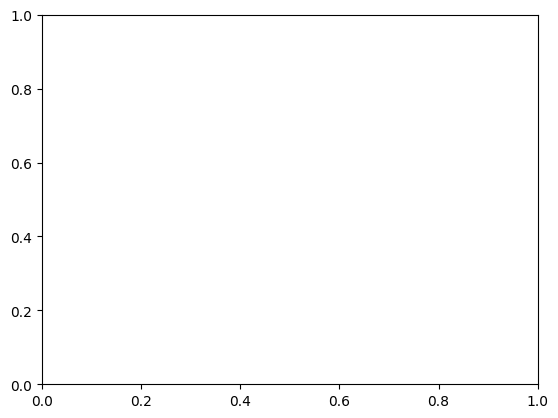

In [372]:
model.fit(X_train, Y_train)

In [355]:
test_data_prediction=model.predict(X_test)

In [356]:
Y_test

array([ 46205,  39343,  61111,  57189,  98273,  93940, 113812,  60150,
        43525,  91738])

In [337]:
def plot(X_test,Y_test,test_data_prediction):
      plt.scatter(X_test, Y_test, color = 'red')
      plt.plot(X_test, test_data_prediction, color='blue')
      plt.xlabel(' Work Experience')
      plt.ylabel('Salary')
      plt.title(' Salary vs Experience')
      plt.show()

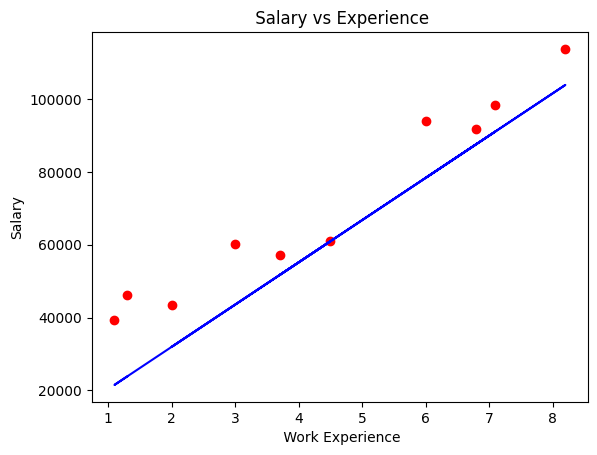

In [357]:
plot(X_test,Y_test,test_data_prediction)